# Project_top_secret_data_analysis_and_predictions

## 0. Введение

Импорт библиотек

In [96]:
import numpy as np # downgrade from 1.16.4: pip install numpy==1.16.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Загрузка данных

In [97]:
d_train = pd.read_csv('train.csv')

Анализ структуры данных

In [98]:
print(list(d_train.columns))

['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'Price']


In [99]:
print(list(d_test.columns))

['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear']


In [100]:
(set(d_train.columns).difference(set(d_test.columns)),
set(d_test.columns).difference(set(d_train.columns)))

({'Ecology_1',
  'Ecology_2',
  'Ecology_3',
  'Healthcare_1',
  'Helthcare_2',
  'Id',
  'Price',
  'Shops_1',
  'Shops_2',
  'Social_1',
  'Social_2',
  'Social_3'},
 set())

Видим, что в тестовых данных отсутствует цена

In [101]:
d_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [102]:
d_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000


In [103]:
(d_train.shape, d_test.shape)

((10000, 20), (5000, 8))

Видим, что в тестовых данных в два раза меньше наблюдений. Также в них 19 столбцов-признаков в отличие от 20 в тренировочных, что согласуется со сделанным ранее выводом об отсутствии цены.

Выясним типы данных

In [104]:
pd.concat([d_train.dtypes, d_test.dtypes], axis=1, sort=False).transpose()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,int64,int64,float64,float64,float64,float64,int64,float64,int64,float64,object,object,int64,int64,int64,float64,int64,int64,object,float64
1,NaN,int64,float64,float64,float64,float64,int64,float64,int64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Структура данных довольно-таки ясна. Приступаем к более подробному анализу и очистке данных.

## 1. Очистка данных

NaN, такой NaN...

In [105]:
where_ls_nan = d_train.loc[d_train['LifeSquare'].isnull(),'LifeSquare'].index
where_ls_nan.shape

(2113,)

Видим, что признак LifeSquare содержит много пропусков (примерно 1/5 часть от тренировочного датасета)

In [106]:
where_sq_nan = d_train.loc[d_train['Square'].isnull(),'Square'].index
where_sq_nan.shape

(0,)

Видим, что признак Square пропусков не содержит. Также и с KitchenSquare.

In [107]:
where_ksq_nan = d_train.loc[d_train['KitchenSquare'].isnull(),'KitchenSquare'].index
where_ksq_nan.shape

(0,)

Напрашивается проверить корреляцию площадей и заменить пропуски в LifeSquare значениями Square.

In [108]:
d_train.loc[:,['Square','LifeSquare']].corr()

,Square,LifeSquare
Square,1.000000,0.196129
LifeSquare,0.196129,1.000000


Корреляция слабая. Однако следует проверить эти данные на наличие выбросов, сильно искажающих коэффициент корреляции. В этом нам поможет boxplot библиотеки seaborn. Удобно сразу же проанализировать градацию по комнатам - число комнат, как правило, небольшое.

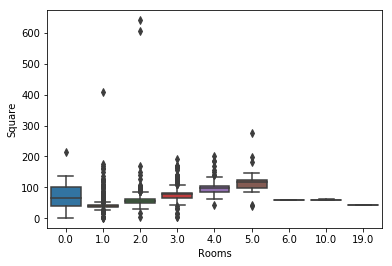

In [109]:
sb.boxplot(x=d_train['Rooms'],y=d_train['Square'])

Да, выбросы есть. Найдем индексы, указывающие на адрес выбросов в датафрейме, причем с учетом LifeSquare, а также выведем количество выбросов. За одно выведем те количества комнат, где нет выбросов по площадям.

In [110]:
where_outliers_room = []
where_good = []
rooms = sorted(list(d_train['Rooms'].unique()))
rare_rooms = []
for nr in rooms:
    loc_r = (d_train['Rooms'] == nr)
    #
    q1 = d_train.loc[loc_r, 'Square'].quantile(0.25)
    q3 = d_train.loc[loc_r, 'Square'].quantile(0.75)
    iqr = q3 - q1
    max_val = q3 + 1.5 * iqr
    min_val = q1 - 1.5 * iqr
    #
    q1_l = d_train.loc[loc_r, 'LifeSquare'].quantile(0.25)
    q3_l = d_train.loc[loc_r, 'LifeSquare'].quantile(0.75)
    iqr_l = q3_l - q1_l    
    max_val_l = q3_l + 1.5 * iqr_l
    min_val_l = q1_l - 1.5 * iqr_l
    #
    loc_l = (d_train['Square'] < min_val) | (d_train['LifeSquare'] < min_val_l)
    loc_h = (d_train['Square'] > max_val) | (d_train['LifeSquare'] > max_val_l)
    li = list(d_train.loc[loc_r & (loc_l | loc_h),'Square'].index)
    if li:
        where_outliers_room.extend(li)
    else:
        rare_rooms.append(nr)
        print('rare rooms', nr)
    where_outliers_room.sort()
    #
    li = list(d_train.loc[loc_r & (~loc_l & ~loc_h),'Square'].index)
    if li:
        where_good.extend(li)    
    where_good.sort()
print('where outliers', len(where_outliers_room))
print('where good', len(where_good))
# print('Outlier\'s indexies', where_outliers_room)

rare rooms 6.0
rare rooms 10.0
rare rooms 19.0
where outliers 1666
where good 8334


In [111]:
d_train.loc[where_good,['Square','LifeSquare']].corr()

,Square,LifeSquare
Square,1.000000,0.919091
LifeSquare,0.919091,1.000000


Коэффициент корреляции между Square и LifeSquare 0,9. Это более правдоподобная оценка, чем предыдущая.

Выясним почему нет выбросов по площади для найденного выше количества комнат.

In [112]:
if rare_rooms:
    loc_ = (d_train['Rooms'] == rare_rooms[0])
    for nr in rare_rooms:
        loc_ = loc_ | (d_train['Rooms'] == nr)
    print(d_train.loc[loc_,'Square'].value_counts())

42.006046    1
60.871266    1
59.056975    1
59.414334    1
Name: Square, dtype: int64


Для найденного количества комнат мало наблюдений.

Введем новый датафрейм, в котором постепенно будут формироваться очищенные данные, по которым будет обучаться модель.

In [113]:
d_train_cleared = d_train.copy()

Заменим пропущенные значения признака LifeSquare соответствующими значениями Square. Для этого используем регрессионную формулу $y = m_y + {r}_{xy} \frac{\sigma_y}{\sigma_x}(x - m_x)$, куда входит оцененный коэффициент корреляции ${r}_{xy}$.

In [114]:
tmp = d_train.loc[where_good, ['Square','LifeSquare']].describe().loc[['mean','std'],:]
tmp

,Square,LifeSquare
mean,54.613645,32.498192
std,16.662558,11.557437


In [115]:
m_y = tmp.loc['mean', 'LifeSquare']
m_x = tmp.loc['mean', 'Square']
rms_x = tmp.loc['std', 'Square']
rms_y = tmp.loc['std', 'LifeSquare']
r_ls = d_train.loc[where_good,['Square','LifeSquare']].corr()['LifeSquare'][0]
d_train_cleared.loc[where_ls_nan, 'LifeSquare'] = \
    m_y + (rms_y / rms_x) * r_ls * (d_train_cleared.loc[where_ls_nan, 'Square'] - m_x)

In [224]:
(r_ls, m_y, m_x, rms_y, rms_x)

(0.9190914849574882,
 32.49819187635092,
 54.61364518782359,
 11.55743687410469,
 16.662558467940258)

Проверим остались ли NaN

In [117]:
d_train_cleared.loc[d_train_cleared['LifeSquare'].isnull(),'LifeSquare'].index

Int64Index([], dtype='int64')

NaNы были успешно заменены.

 Удалим редкие строки (наблюдения) с найденным выше количеством комнат.

In [118]:
if rare_rooms:
    d_train_cleared.drop(d_train[loc_].index, inplace=True)

In [119]:
d_train_cleared.shape

(9996, 20)

Удалено 4 строки. Удалим данные с выбросами.

In [120]:
if where_outliers_room:
    d_train_cleared.drop(where_outliers_room, inplace=True)

In [121]:
d_train_cleared.shape

(8330, 20)

Удалено 1666 строк, что согласуется с длиной списка индексов.

Проанализируем ситуацию с помощью графика boxplot еще раз.

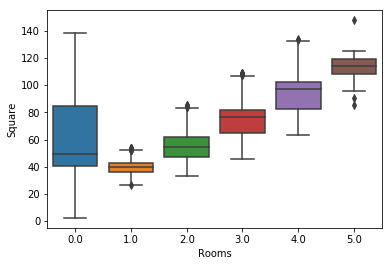

In [122]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['Square'])

Интересный эффект... Если сравнить с предыдущим графиком, то становится ясно, что данные почистились. Однако, для "чистых" данных оценки квартилей несколько поменялись и появились новые выбросы (своего рода итерация). Но остановимся на этом.

Проверим, что с признаком LifeSquare.

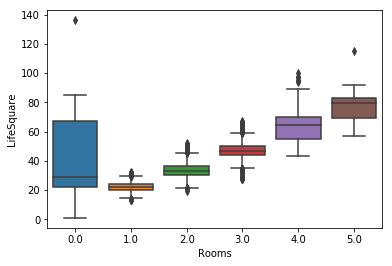

In [123]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['LifeSquare'])

Ok. That is good.

Изучим признак KitchenSquare.

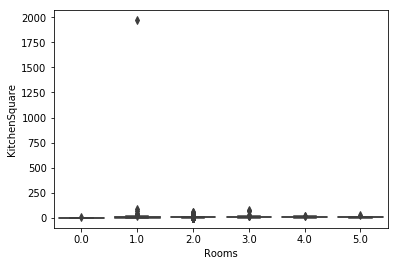

In [124]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['KitchenSquare'])

Узнаем локацию выбросов.

In [125]:
where_outliers_room = []
where_good = []
rooms = sorted(list(d_train_cleared['Rooms'].unique()))
rare_rooms = []
for nr in rooms:
    loc_r = (d_train_cleared['Rooms'] == nr)
    #
    q1 = d_train_cleared.loc[loc_r, 'KitchenSquare'].quantile(0.25)
    q3 = d_train_cleared.loc[loc_r, 'KitchenSquare'].quantile(0.75)
    iqr = q3 - q1
    max_val = q3 + 1.5 * iqr
    min_val = q1 - 1.5 * iqr
    #
    loc_l = (d_train_cleared['KitchenSquare'] < min_val)
    loc_h = (d_train_cleared['KitchenSquare'] > max_val)
    li = list(d_train_cleared.loc[loc_r & (loc_l | loc_h),'KitchenSquare'].index)
    if li:
        where_outliers_room.extend(li)
    else:
        rare_rooms.append(nr)
        print('rare rooms', nr)
    where_outliers_room.sort()
    #
    li = list(d_train_cleared.loc[loc_r & (~loc_l & ~loc_h),'KitchenSquare'].index)
    if li:
        where_good.extend(li)    
    where_good.sort()
print('where outliers', len(where_outliers_room))
print('where good', len(where_good))
# print('Outlier\'s indexies', where_outliers_room)

where outliers 259
where good 8071


Удалим строки с выбросами.

In [126]:
if where_outliers_room:
    d_train_cleared.drop(where_outliers_room, inplace=True)

In [127]:
d_train_cleared.shape

(8071, 20)

Удалено 259 строк.

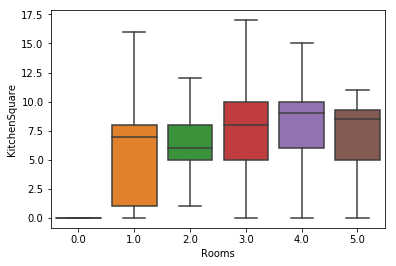

In [128]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['KitchenSquare'])

Выбросы удалены. Проверим корреляцию всех трех площадей.

In [129]:
d_train_cleared[['Square','LifeSquare','KitchenSquare']].corr()

,Square,LifeSquare,KitchenSquare
Square,1.000000,0.937811,0.127825
LifeSquare,0.937811,1.000000,0.056736
KitchenSquare,0.127825,0.056736,1.000000


Все-таки KitchenSquare слабо коррелирует с остальными площадьми.

Посмотрим что там с количеством комнат 0.

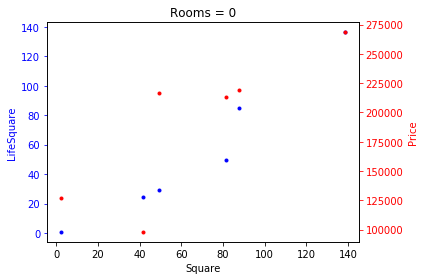

In [130]:
x = d_train_cleared.loc[d_train_cleared['Rooms'] == 0, 'Square']
y = d_train_cleared.loc[d_train_cleared['Rooms'] == 0, 'LifeSquare']
z = d_train_cleared.loc[d_train_cleared['Rooms'] == 0, 'Price']

fig, ax1 = plt.subplots()
ax1.plot(x, y, 'b.')
ax1.set_xlabel('Square')
ax1.set_ylabel('LifeSquare', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, z, 'r.')
ax2.set_ylabel('Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Rooms = 0')

fig.tight_layout()
plt.show()

In [131]:
d_train_cleared.loc[d_train_cleared['Rooms']==0,['Square','LifeSquare','Price']].corr()

,Square,LifeSquare,Price
Square,1.000000,0.967156,0.831970
LifeSquare,0.967156,1.000000,0.802245
Price,0.831970,0.802245,1.000000


Корреляция, конечно, какая никакая есть, но удалим данные с количеством комнат 0, т.к. таких данных немного относительно общего количества.

In [132]:
d_train_cleared.drop(d_train_cleared.loc[d_train_cleared['Rooms']==0].index, inplace=True)

In [133]:
d_train_cleared.shape

(8065, 20)

Взглянем на очищающиеся данные свысока.

In [134]:
d_train_cleared.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,8065.000000,8065.000000,8065.000000,8065.000000,8065.000000,8065.000000,8065.000000,8065.000000,8.065000e+03,8065.000000,8065.000000,8065.000000,8065.000000,4403.000000,8065.000000,8065.000000,8065.000000
mean,8367.764786,53.986857,1.906014,54.258223,32.914145,6.164538,8.265716,12.501550,4.468602e+03,0.120746,26.826286,5765.473900,7.966274,1183.368385,1.428642,4.451209,215411.832401
std,4862.415303,45.273451,0.817617,16.643913,11.384997,3.417840,5.007430,6.000891,2.232610e+05,0.120148,17.134135,3960.699262,22.682371,1056.030036,1.494085,4.697140,89751.803613
min,2.000000,0.000000,1.000000,26.474009,13.112906,0.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4158.000000,21.000000,1.000000,41.245823,23.163085,5.000000,4.000000,9.000000,1.971000e+03,0.019509,14.000000,2810.000000,0.000000,325.000000,0.000000,1.000000,158131.630857
50%,8378.000000,44.000000,2.000000,49.708472,31.232627,7.000000,7.000000,12.000000,1.977000e+03,0.075779,26.000000,5613.000000,2.000000,990.000000,1.000000,4.000000,195061.180362
75%,12605.000000,85.000000,3.000000,64.221657,40.275318,9.000000,11.000000,17.000000,1.994000e+03,0.194489,37.000000,7651.000000,5.000000,1575.000000,3.000000,6.000000,250122.101897
max,16798.000000,209.000000,5.000000,147.709302,114.913843,17.000000,42.000000,48.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Видим, что признак HouseYear содержит выбросы (видно по максимуму).

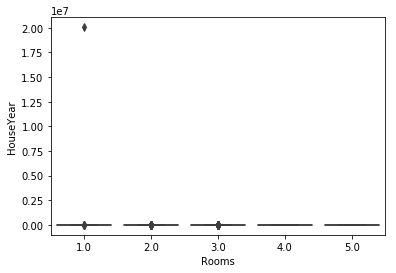

In [135]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['HouseYear'])

In [136]:
d_train_cleared['HouseYear'].max()

20052011

In [137]:
d_train_cleared.loc[d_train_cleared['HouseYear'] == 20052011, ['HouseFloor','Price','Square']]

,HouseFloor,Price,Square
1497,12.0,254084.534396,37.26507


In [138]:
d_train_cleared.loc[(d_train_cleared['HouseYear'] == 2005) & (d_train_cleared['HouseFloor'] == 12), ['Price','Square']]

,Price,Square
587,243933.532250,59.604366
2658,141620.052816,41.470222
5564,287552.530300,78.937253
7130,305780.187311,81.571150
7396,176870.243348,42.318213
8454,368588.150906,79.295613
9246,240122.985877,59.583985


... после эвристического анализа возникает склонность заменить 20052011 на 2005 год.

In [139]:
ir = d_train_cleared.loc[d_train_cleared['HouseYear'] == 20052011, ['HouseYear']].index
d_train_cleared.loc[d_train_cleared['HouseYear'] == 20052011, ['HouseYear']] = 2005

In [140]:
d_train_cleared.loc[ir, 'HouseYear']

1497    2005
Name: HouseYear, dtype: int64

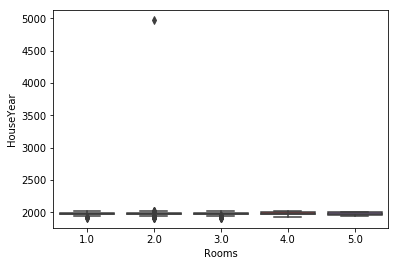

In [141]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['HouseYear'])

Идет 5000 год н.э....

In [142]:
d_train_cleared.loc[d_train_cleared['HouseYear'] > 4500, ['HouseYear']]

,HouseYear
4189,4968


Недолго думая, корректируем год на 1968.

In [143]:
d_train_cleared.loc[d_train_cleared['HouseYear'] == 4968, ['HouseYear']] = 1968

In [144]:
d_train_cleared.loc[4189, 'HouseYear']

1968

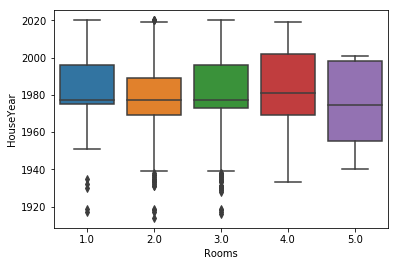

In [145]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['HouseYear'])

О! Выбросы есть, но пока их трогать не будем.

Проверим корректность данных на логику (Floor <= HouseFloor), т.е. "этаж не превышает этажность".

In [146]:
where_bad_floor = (d_train_cleared['Floor'] > d_train_cleared['HouseFloor'])
d_train_cleared.loc[where_bad_floor, ].shape[0]

1282

Видим, что относительно много логически противоречивых данных.

Заменим в таких данных значение этажа этажностью дома, деленной на два.

In [147]:
hf = d_train_cleared.loc[where_bad_floor, ['HouseFloor']]
d_train_cleared.loc[where_bad_floor, ['Floor']] = np.floor(hf.values/2)

In [148]:
sum(d_train_cleared['Floor'] > d_train_cleared['HouseFloor'])

0

Видим, что логическое противоречие исчезло.

Вычислим количество наблюдений для каждой этажности дома.

In [149]:
target = 'HouseFloor'
hfs = list(d_train_cleared[target].unique())
hfs.sort()
vc = []
for hf in hfs:
    vc.append(d_train_cleared.loc[d_train_cleared[target] == hf, [target]].shape[0])
vchf = pd.DataFrame({target: hfs, 'Count':vc})

Text(0, 0.5, 'Count')

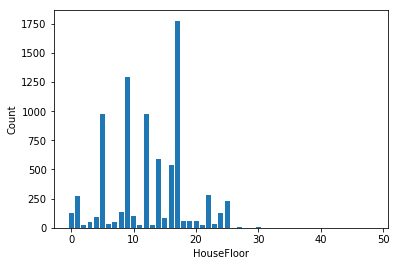

In [150]:
plt.bar(vchf[target], vchf['Count'])
plt.xlabel(target)
plt.ylabel('Count')

Удалим данные с количеством наблюдений меньше порогового уровня.

In [151]:
low_limit = 50
target = 'HouseFloor'
where_not_enough = []
hfs = list(d_train_cleared[target].unique())
hfs.sort()
for hf in hfs:
    where_ = (d_train_cleared[target] == hf)
    loc_ = d_train_cleared.loc[where_, [target]]
    vc = loc_.shape[0]
    if vc < low_limit:
        where_not_enough.extend(loc_.index)
where_not_enough.sort()
print(len(where_not_enough))
# print(where_not_enough)

218


In [152]:
d_train_cleared.drop(where_not_enough, inplace=True)
d_train_cleared.shape

(7847, 20)

Видим, что число наблюдений уменьшилось на 218.

Что ж, удалим наблюдения с маловероятными годами.

In [153]:
where_outliers_room = []
where_good = []
rooms = sorted(list(d_train_cleared['Rooms'].unique()))
for nr in rooms:
    loc_r = (d_train_cleared['Rooms'] == nr)
    #
    q1 = d_train_cleared.loc[loc_r, 'HouseYear'].quantile(0.25)
    q3 = d_train_cleared.loc[loc_r, 'HouseYear'].quantile(0.75)
    iqr = q3 - q1
    max_val = q3 + 1.5 * iqr
    min_val = q1 - 1.5 * iqr
    #
    loc_l = (d_train_cleared['HouseYear'] < min_val)
    loc_h = (d_train_cleared['HouseYear'] > max_val)
    li = list(d_train_cleared.loc[loc_r & (loc_l | loc_h),'HouseYear'].index)
    if li:
        where_outliers_room.extend(li)
    where_outliers_room.sort()
    #
    li = list(d_train_cleared.loc[loc_r & (~loc_l & ~loc_h),'HouseYear'].index)
    if li:
        where_good.extend(li)    
    where_good.sort()
print('where outliers', len(where_outliers_room))
print('where good', len(where_good))
# print('Outlier\'s indexies', where_outliers_room)

where outliers 105
where good 7742


In [154]:
d_train_cleared.drop(where_outliers_room, inplace=True)
d_train_cleared.shape

(7742, 20)

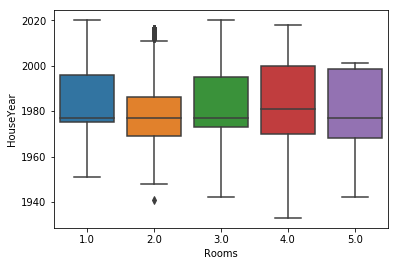

In [155]:
sb.boxplot(x=d_train_cleared['Rooms'],y=d_train_cleared['HouseYear'])

Все Ok, кроме количества комнат 2. Посмотрим что там не так.

In [156]:
print(d_train_cleared.loc[d_train_cleared['Rooms'] == 2, 'HouseYear'].max())
print(d_train_cleared.loc[d_train_cleared['Rooms'] == 2, 'HouseYear'].shape[0])

2016
2923


Все хорошо, максимум приходится на 2016 год. Этот год валидный (меньше текущего 2019). Наблюдений 2923 - достаточно.

Посмотрим на распределение наблюдений по районам, и по аналогии удалим редкие наблюдения.

In [157]:
target = 'DistrictId'
hfs = list(d_train_cleared[target].unique())
hfs.sort()
vc = []
for hf in hfs:
    vc.append(d_train_cleared.loc[d_train_cleared[target] == hf, [target]].shape[0])
vchf = pd.DataFrame({target: hfs, 'Count':vc})

Text(0, 0.5, 'Count')

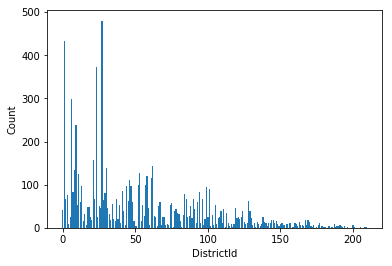

In [158]:
plt.bar(vchf[target], vchf['Count'])
plt.xlabel(target)
plt.ylabel('Count')

In [159]:
low_limit = 10
target = 'DistrictId'
where_not_enough = []
hfs = list(d_train_cleared[target].unique())
hfs.sort()
for hf in hfs:
    where_ = (d_train_cleared[target] == hf)
    loc_ = d_train_cleared.loc[where_, [target]]
    vc = loc_.shape[0]
    if vc < low_limit:
        where_not_enough.extend(loc_.index)
where_not_enough.sort()
print(len(where_not_enough))
# print(where_not_enough)

364


In [160]:
d_train_cleared.drop(where_not_enough, inplace=True)
d_train_cleared.shape

(7378, 20)

Посмотрим на корреляцию цены и этажа квартиры.

In [161]:
d_train_cleared.loc[:,['Floor','Price']].corr()

,Floor,Price
Floor,1.000000,0.129139
Price,0.129139,1.000000


Особенной корреляции нет. Однако, усредним цену, тем самым сгладив влияние других факторов.

In [162]:
mp = []
fs = list(d_train_cleared['Floor'].unique())
fs.sort()
for f in fs:
    mp.append( d_train_cleared.loc[d_train_cleared['Floor'] == f, 'Price'].mean() )
pf = pd.DataFrame({'Floor': fs, 'MeanPrice': mp})

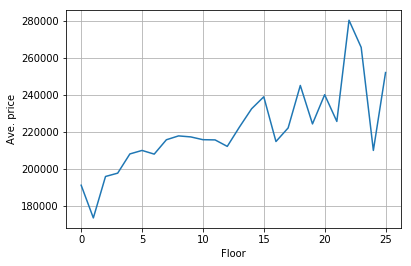

In [163]:
plt.plot(pf['Floor'], pf['MeanPrice'])
plt.xlabel('Floor')
plt.ylabel('Ave. price')
plt.grid(True)

In [164]:
pf.corr()

,Floor,MeanPrice
Floor,1.000000,0.787802
MeanPrice,0.787802,1.000000


Видим, что средняя цена коррелирует с этажом квартиры. Значит этажом при построении модели пренебрегать нельзя.

In [165]:
mp = []
hys = list(d_train_cleared['HouseYear'].unique())
hys.sort()
for hy in hys:
    mp.append( d_train_cleared.loc[d_train_cleared['HouseYear'] == hy, 'Price'].mean() )
phy = pd.DataFrame({'HouseYear': hys, 'MeanPrice': mp})

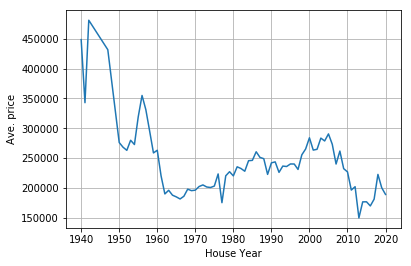

In [166]:
plt.plot(phy['HouseYear'], phy['MeanPrice'])
plt.xlabel('House Year')
plt.ylabel('Ave. price')
plt.grid(True)

Более достоверные данные выше 1960 года. Видно, что цена в среднем росла со временем, а затем пошел спад (это связано видимо с тем, что цена выражена в долларах США). Делаем вывод, что исключать год из модели нельзя.

Посмотрим как обстоят дела с районированием средней цены.

In [167]:
mp = []
dIds = list(d_train_cleared['DistrictId'].unique())
dIds.sort()
for dId in dIds:
    mp.append( d_train_cleared.loc[d_train_cleared['DistrictId'] == dId, 'Price'].mean() )
pdIds = pd.DataFrame({'DistrictId': dIds, 'MeanPrice': mp})

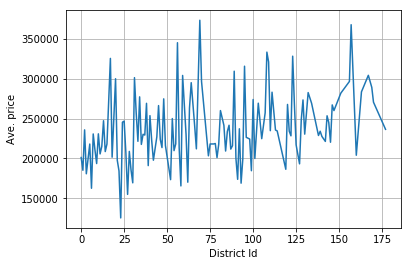

In [168]:
plt.plot(pdIds['DistrictId'], pdIds['MeanPrice'])
plt.xlabel('District Id')
plt.ylabel('Ave. price')
plt.grid(True)

In [169]:
pdIds.corr()

,DistrictId,MeanPrice
DistrictId,1.00000,0.33246
MeanPrice,0.33246,1.00000


Все-таки, между идентификатором района и средней ценой есть корреляция (0.3). Медианная привязка не улучшает корреляцию.

In [171]:
d_train_cleared.reset_index(drop=True, inplace=True)
d_train_cleared.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,3963.000000,7378.000000,7378.000000,7378.000000
mean,8340.829493,49.316346,1.885606,53.801495,32.602107,6.068989,7.061263,12.591759,1982.446598,0.120168,26.968555,5798.069802,6.337490,1118.306081,1.386961,4.316075,209921.446332
std,4865.252713,40.373825,0.816783,16.352327,11.206266,3.430360,4.791637,5.904857,15.809363,0.118309,17.384561,4012.221497,20.180693,1006.784969,1.482363,4.605089,84869.812091
min,2.000000,0.000000,1.000000,26.474009,13.112906,0.000000,0.000000,0.000000,1940.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4107.250000,18.000000,1.000000,41.086730,23.041820,5.000000,3.000000,9.000000,1972.000000,0.020741,11.000000,2787.000000,0.000000,320.000000,0.000000,1.000000,155779.799459
50%,8358.500000,39.000000,2.000000,49.025081,30.976990,6.000000,6.000000,12.000000,1977.000000,0.075779,27.000000,5613.000000,2.000000,900.000000,1.000000,3.000000,191424.877393
75%,12574.750000,78.000000,2.000000,63.790262,39.836310,9.000000,10.000000,17.000000,1992.000000,0.194489,37.000000,7687.000000,4.000000,1547.000000,3.000000,6.000000,243326.161801
max,16798.000000,177.000000,5.000000,147.709302,114.913843,16.000000,25.000000,25.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,624156.003381


In [172]:
d_train_cleared.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
3,12915,59,3.0,80.384479,46.683720,12.0,5.0,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
4,5172,1,2.0,64.511437,38.808011,1.0,9.0,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999


## 2. Реструктуризация данных

Создадим список признаков, которые в модели, по предположению простоты, будут лишними.

In [173]:
ignored_fn = ['Id', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', \
      'Helthcare_2', 'Shops_1', 'Shops_2']

Выделим целевой признак - цену.

In [174]:
target_fn = ['Price']
d_target = d_train_cleared[target_fn]

Удалим лишние столбцы и создадим датафрейм для построения модели.

In [175]:
d_train_model = d_train_cleared.drop(ignored_fn, axis = 1)

In [176]:
d_train_model.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Price
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,300009.450063
2,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,150226.531644
3,59,3.0,80.384479,46.683720,12.0,5.0,17.0,2011,215898.447742
4,1,2.0,64.511437,38.808011,1.0,9.0,17.0,1977,229102.795999


In [177]:
d_target.head()

,Price
0,184966.930730
1,300009.450063
2,150226.531644
3,215898.447742
4,229102.795999


Введем синтетический столбец MeanPrice в зависимости от Id района.

In [178]:
fn_group = ['DistrictId']
mp = d_train_model.groupby(fn_group)[['Price']].mean().rename(columns = {'Price': 'MeanPrice'})
mp.head()

,MeanPrice
DistrictId,
0,201163.355113
1,185183.291572
2,235846.511861
3,180782.476194
5,218075.978335


In [179]:
d_train_model = pd.merge(d_train_model, mp, on = fn_group, how = 'left')

In [180]:
d_train_model.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Price,MeanPrice
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,184966.930730,217624.889286
1,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,300009.450063,222913.826507
2,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,150226.531644,184622.494475
3,59,3.0,80.384479,46.683720,12.0,5.0,17.0,2011,215898.447742,304081.877487
4,1,2.0,64.511437,38.808011,1.0,9.0,17.0,1977,229102.795999,185183.291572


In [181]:
sum(d_train_model['MeanPrice'].isnull())

0

Пустых значений в созданном столбце нет.

In [186]:
d_train_model.drop(target_fn, axis = 1, inplace = True)

Скопируем датафрейм в хранилище.

In [187]:
d_store = d_train_model.copy()

- Точка возврата!

In [188]:
d_train_model = d_store.copy()

## 3. Построение модели

In [189]:
import sklearn as skl
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Сделаем 200 разных выборок тестовых и тренировочных данных. Выведем оценки метрики R2 (минимум, максимум, среднее).

In [190]:
lr = Ridge(alpha = 0.01) # LinearRegression()
r2 = np.zeros([200, 1])
for state in range(len(r2)):
    x_train, x_test, y_train, y_test = train_test_split(d_train_model, d_target, test_size = 0.3, random_state = state)    
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    r2[state] = r2_score(y_test, y_pred)
print('Min R2 = {:0.2f}'.format(np.min(r2)))
print('Max R2 = {:0.2f}'.format(np.max(r2)))
print('Mean R2 = {:0.2f}'.format(np.mean(r2)))

Min R2 = 0.64
Max R2 = 0.72
Mean R2 = 0.68


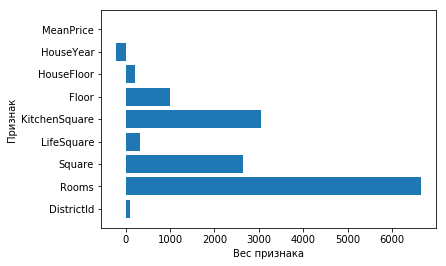

In [191]:
plt.barh(d_train_model.columns, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Попробуем сделать масштабирование данных.

In [192]:
lr_sc = Ridge(alpha = 0.01) # LinearRegression()
scaler = MinMaxScaler()
fn_sc = d_train_model.columns
r2 = np.zeros([200, 1])
for state in range(len(r2)):
    x_train, x_test, y_train, y_test = train_test_split(d_train_model, d_target, test_size = 0.3, random_state = state) 
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()    
    x_train_scaled[fn_sc] = scaler.fit_transform(x_train[fn_sc])
    x_test_scaled[fn_sc] = scaler.transform(x_test[fn_sc])
    lr_sc.fit(x_train_scaled, y_train)
    y_pred = lr_sc.predict(x_test_scaled)
    r2[state] = r2_score(y_test, y_pred)
print('Min R2 = {:0.2f}'.format(np.min(r2)))
print('Max R2 = {:0.2f}'.format(np.max(r2)))
print('Mean R2 = {:0.2f}'.format(np.mean(r2)))

Min R2 = 0.64
Max R2 = 0.72
Mean R2 = 0.68


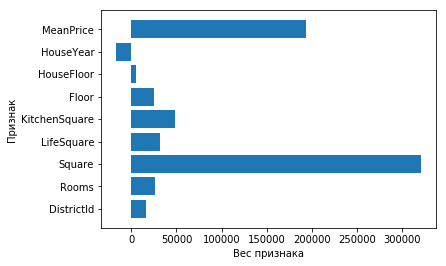

In [193]:
plt.barh(d_train_model.columns, lr_sc.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Видим, что веса перераспределились. Теперь главной компонентой является площадь Square.

Будем думать в сторону кластеризации и понижения размерности.

In [194]:
from sklearn.decomposition import PCA

In [195]:
lr_sc_pca = Ridge(alpha = 0.01) # LinearRegression()
scaler = MinMaxScaler()
fn_sc = d_train_model.columns
r2 = np.zeros([200, 1])
for state in range(len(r2)):
    x_train, x_test, y_train, y_test = train_test_split(d_train_model, d_target, test_size = 0.3, random_state = state) 
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()    
    x_train_scaled[fn_sc] = scaler.fit_transform(x_train[fn_sc])
    x_test_scaled[fn_sc] = scaler.transform(x_test[fn_sc])
    pca = PCA(random_state = state)
    pca.fit(x_train_scaled)
    pca = PCA(n_components = 5, random_state = state)    
    x_train_mc = pca.fit_transform(x_train_scaled)
    x_test_mc = pca.transform(x_test_scaled)
    lr_sc_pca.fit(x_train_mc, y_train)    
    y_pred = lr_sc_pca.predict(x_test_mc)
    r2[state] = r2_score(y_test, y_pred)
print('Min R2 = {:0.2f}'.format(np.min(r2)))
print('Max R2 = {:0.2f}'.format(np.max(r2)))
print('Mean R2 = {:0.2f}'.format(np.mean(r2)))


Min R2 = 0.59
Max R2 = 0.67
Mean R2 = 0.62


In [196]:
pca.explained_variance_ratio_[:pca.n_components].sum()

0.8964137938215538

In [197]:
pca.n_components

5

In [198]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, learning_rate=200, random_state=100)
x_train_tsne = tsne.fit_transform(x_train_scaled)

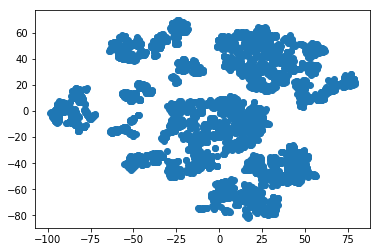

In [199]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.show()

In [243]:
from sklearn.cluster import KMeans
ncluster = 4

lr_sc = Ridge(alpha = 0.01) # LinearRegression()
scaler = MinMaxScaler()
fn_sc = d_train_model.columns
r2 = np.zeros([200, 1])
for state in range(len(r2)):
    model = KMeans(n_clusters = ncluster, random_state = state)
    x_train, x_test, y_train, y_test = train_test_split(d_train_model, d_target, test_size = 0.3, random_state = state) 
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()    
    x_train_scaled[fn_sc] = scaler.fit_transform(x_train[fn_sc])
    x_test_scaled[fn_sc] = scaler.transform(x_test[fn_sc])
    
    labels_train = model.fit_predict(x_train_scaled)
    labels_test = model.predict(x_test_scaled)
    y_test_all = []
    y_test_pred_all = []
    
    lr_model_cluster = []
    for cluster in range(ncluster):
        lr_sc.fit(x_train_scaled.loc[labels_train == cluster], y_train[labels_train == cluster])
        lr_model_cluster.append(lr_sc)
        y_test_pred_ = lr_sc.predict(x_test_scaled.loc[labels_test == cluster])
        y_test_all += list(y_test[labels_test == cluster].values)
        y_test_pred_all += list(y_test_pred_)
    r2[state] = r2_score(y_test_all, y_test_pred_all)
print('Min R2 = {:0.2f}'.format(np.min(r2)))
print('Max R2 = {:0.2f}'.format(np.max(r2)))
print('Mean R2 = {:0.2f}'.format(np.mean(r2)))   

Min R2 = 0.65
Max R2 = 0.74
Mean R2 = 0.69


Т.к. точность предсказания после введения кластеров несколько возросла, то остановимся на этой модели: линейная регрессия с масштабированием и разбиением на кластеры.

Перейдем к предсказанию цены по тестовым данным и формированию итогового файла.

## 4. Предсказание цены

In [353]:
d_test = pd.read_csv('test.csv')

In [354]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [355]:
d_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [356]:
d_test.shape

(5000, 19)

In [357]:
d_test = d_test.drop(ignored_fn, axis = 1)

In [358]:
d_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000


In [359]:
sum(d_test['LifeSquare'].isnull())

1041

In [360]:
sum(d_test['Square'].isnull())

0

In [361]:
d_test.loc[d_test['LifeSquare'].isnull(), 'LifeSquare'] = m_y + r_ls * (rms_y / rms_x) * (d_test.loc[d_test['LifeSquare'].isnull(), 'Square'] - m_x)

In [362]:
sum(d_test['LifeSquare'].isnull())

0

In [363]:
d_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972
1,74,2.0,69.263183,41.837238,1.0,6,1.0,1977
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017


In [364]:
where_bad_floor = (d_test['Floor'] > d_test['HouseFloor'])

In [365]:
sum(where_bad_floor)

884

In [366]:
hf = d_test.loc[where_bad_floor, ['HouseFloor']]
d_test.loc[where_bad_floor, ['Floor']] = np.floor(hf.values/2)

In [367]:
sum(d_test['Floor'] > d_test['HouseFloor'])

0

In [368]:
sum(d_test['KitchenSquare'].isnull())

0

In [369]:
d_test = pd.merge(d_test, mp, on = fn_group, how = 'left')

In [370]:
d_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,MeanPrice
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,165576.986125
1,74,2.0,69.263183,41.837238,1.0,0.0,1.0,1977,203310.454353
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,NaN
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,213625.761375
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,154976.203745


In [371]:
mean_price = d_test['MeanPrice'].mean()
print(mean_price)

206645.0910871218


In [372]:
d_test['MeanPrice'].fillna(mean_price, inplace = True)
d_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,MeanPrice
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,165576.986125
1,74,2.0,69.263183,41.837238,1.0,0.0,1.0,1977,203310.454353
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,206645.091087
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,213625.761375
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,154976.203745


In [373]:
x_test = d_test.copy()    
x_test_scaled = x_test.copy()
x_test_scaled[fn_sc] = scaler.transform(x_test[fn_sc])
labels_test = model.predict(x_test_scaled)
indexies = []
prices = []
for cluster in range(ncluster):
    where_ = x_test_scaled.loc[labels_test == cluster]
    y_pred_ = lr_model_cluster[cluster].predict(where_)
    s1 = pd.Series(where_.index)
    s2 = pd.Series(y_pred_.reshape(-1))
    indexies.extend(list(where_.index))
    prices.extend(list(y_pred_.reshape(-1)))
y_pred_all = list(zip(indexies, prices))

In [374]:
total = pd.DataFrame(y_pred_all, columns = ['Id', 'Price'])

In [375]:
total.head()

,Id,Price
0,4,155530.376674
1,5,210806.159713
2,6,184829.097487
3,11,256344.284510
4,18,226270.005692


In [376]:
total.shape

(5000, 2)

In [377]:
total.sort_values('Id', inplace = True)

In [378]:
total.head()

,Id,Price
3067,0,172753.033995
3068,1,227559.785191
3069,2,118315.908394
1002,3,295776.958151
0,4,155530.376674
